### Steps for textual data analysis (1 - 5)

1. Cleaning  
    - lowercasing
    - removing leading and trailing spaces
    - removing html tags
    - removing urls
    - Expanding abbreviations
    - Spelling correction
    - punctuations
    - remove special characters

2. Preprocessing
    - Tokenization  - generate tokens of words
    - Stopword removal - words that are not useful for meaning but useful for making sense of sentence. Ex and, or
    - stemming - change the words to their root form. Ex eating, ate, eat -> eat

3. EDA and Feature Engineering
    - Distribution of text length/ word count
    - Common unigrams/bigramstrigrams
    - Wordcloud
4. Vectorization (tfidf, bag_of_words, word2vec)
5. Modelling
6. Evaluation
7. Deploy
8. Monitor

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
df = pd.read_csv('IMDB Dataset.csv')

In [5]:
df.shape

(50000, 2)

In [6]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     100 non-null    object
 1   sentiment  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [8]:
df.duplicated().sum()

0

In [9]:
df = df.drop_duplicates()

In [10]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [11]:
# Cleaning

# lower case
df['review'] = df['review'].str.lower()

In [12]:
# remove whitespaces
df['review'] = df['review'].str.strip()

In [13]:
# remove html tags
df['review'] = df['review'].str.replace(r'<.*?>','',regex=True)

In [14]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [15]:
import re
def remove_url(data):
    data=re.sub(r"https?://\S+|www\.\S+",'',data)
    return data

In [16]:
# code to remove a URL
df['review'] = df['review'].str.replace(r"https?://\S+|www\.\S+",'',regex=True)

In [17]:
# code to check if a review contains an URL
df[df['review'].str.contains(r"https?://\S+|www\.\S+")]

,review,sentiment


In [18]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [19]:
# expanding abbreviations

def remove_abbreviations(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)
    
    return data

In [20]:
df['review'] = df['review'].apply(remove_abbreviations)

In [21]:
df['review']

0     one of the other reviewers has mentioned that ...
1     a wonderful little production. the filming tec...
2     i thought this was a wonderful way to spend ti...
3     basically there is a family where a little boy...
4     petter mattei's "love in the time of money" is...
                            ...                        
95    daniel day-lewis is the most versatile actor a...
96    my guess would be this was originally going to...
97    well, i like to watch bad horror b-movies, cau...
98    this is the worst movie i have ever seen, as w...
99    i have been a mario fan for as long as i can r...
Name: review, Length: 100, dtype: object

In [22]:
from textblob import TextBlob

text = "hi I alwys drve at nigt"
TextBlob(text).correct().string

'hi I always drove at night'

In [23]:
def spelling_correction(text):
    return TextBlob(text).correct().string

In [24]:
df['review'].apply(spelling_correction)

0     one of the other reviews has mentioned that af...
1     a wonderful little production. the filling tec...
2     i thought this was a wonderful way to spend ti...
3     basically there is a family where a little boy...
4     letter matter's "love in the time of money" is...
                            ...                        
95    daniel day-lewis is the most versatile actor a...
96    my guess would be this was originally going to...
97    well, i like to watch bad horror b-moves, caus...
98    this is the worst movie i have ever seen, as w...
99    i have been a marie fan for as long as i can r...
Name: review, Length: 100, dtype: object

In [25]:
# punctuation
import string

In [26]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_puctuation(text):
    
    # for i in string.punctuation:
    #     if i in text:
    #         text = text.replace(i,'')
    return text.translate(str.maketrans("","",string.punctuation)) #this method is 20 times faster then above for loop
    

In [28]:
df['review'] = df['review'].apply(remove_puctuation)
df['review'].head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production the filming tech...
2    i thought this was a wonderful way to spend ti...
3    basically there is a family where a little boy...
4    petter matteis love in the time of money is a ...
Name: review, dtype: object

In [29]:
from nltk.tokenize import word_tokenize

In [30]:
df['review'].apply(word_tokenize)

0     [one, of, the, other, reviewers, has, mentione...
1     [a, wonderful, little, production, the, filmin...
2     [i, thought, this, was, a, wonderful, way, to,...
3     [basically, there, is, a, family, where, a, li...
4     [petter, matteis, love, in, the, time, of, mon...
                            ...                        
95    [daniel, daylewis, is, the, most, versatile, a...
96    [my, guess, would, be, this, was, originally, ...
97    [well, i, like, to, watch, bad, horror, bmovie...
98    [this, is, the, worst, movie, i, have, ever, s...
99    [i, have, been, a, mario, fan, for, as, long, ...
Name: review, Length: 100, dtype: object

In [31]:
df['tokenized_review'] = df['review'].apply(word_tokenize)
df

,review,sentiment,tokenized_review
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production the filming tech...,positive,"[a, wonderful, little, production, the, filmin..."
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,..."
3,basically there is a family where a little boy...,negative,"[basically, there, is, a, family, where, a, li..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, in, the, time, of, mon..."
...,...,...,...
95,daniel daylewis is the most versatile actor al...,positive,"[daniel, daylewis, is, the, most, versatile, a..."
96,my guess would be this was originally going to...,negative,"[my, guess, would, be, this, was, originally, ..."
97,well i like to watch bad horror bmovies cause ...,negative,"[well, i, like, to, watch, bad, horror, bmovie..."
98,this is the worst movie i have ever seen as we...,negative,"[this, is, the, worst, movie, i, have, ever, s..."


In [32]:
# stop word removal
from nltk.corpus import stopwords

In [33]:
def remove_stopwords(text):
    
    L = []
    for word in text:
        if word not in stopwords.words('english'):
            L.append(word)
            
    return L

In [34]:
df['tokenized_review'] = df['tokenized_review'].apply(remove_stopwords) 

In [35]:
df.head()

,review,sentiment,tokenized_review
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,a wonderful little production the filming tech...,positive,"[wonderful, little, production, filming, techn..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically there is a family where a little boy...,negative,"[basically, family, little, boy, jake, thinks,..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, time, money, visually,..."


In [36]:
df['review'] = df['tokenized_review'].apply(lambda x:" ".join(x))

In [37]:
df.head()

,review,sentiment,tokenized_review
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,..."
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,..."


In [38]:
df['char_length'] = df['review'].str.len()

In [39]:
df.head()

,review,sentiment,tokenized_review,char_length
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1142
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",656
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",592
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...",440
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",863


In [40]:
df['word_length'] = df['tokenized_review'].apply(len)

In [41]:
import seaborn as sns

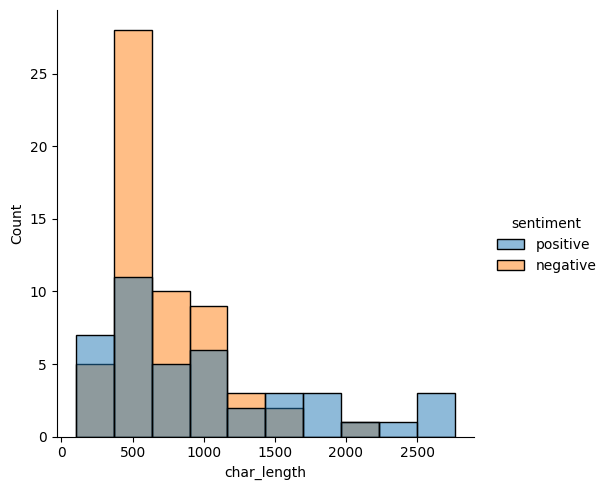

In [42]:
# sns.displot(df[df['sentiment'] == 'positive']['char_length'])
# sns.displot(df[df['sentiment'] == 'negative']['char_length'])
sns.displot(data=df,x='char_length',hue='sentiment')

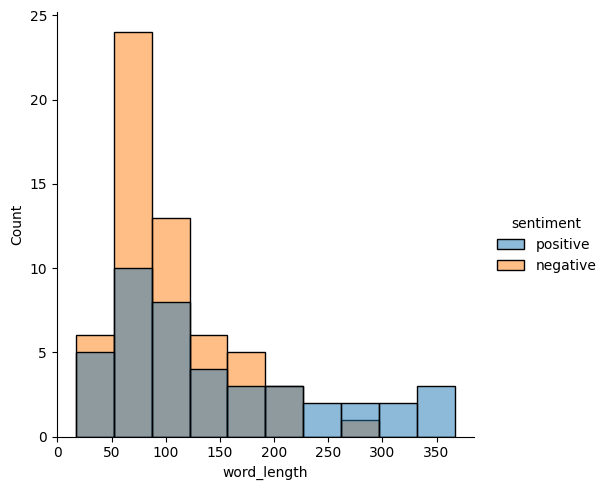

In [43]:
# sns.displot(df[df['sentiment'] == 'positive']['word_length'])
# sns.displot(df[df['sentiment'] == 'negative']['word_length'])
sns.displot(data=df, x='word_length',hue='sentiment')

In [44]:
df.head()

,review,sentiment,tokenized_review,char_length,word_length
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1142,166
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",656,84
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",592,87
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...",440,64
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",863,125


In [45]:
from nltk import ngrams

pd.Series(ngrams(df['tokenized_review'].sum(),2)).value_counts()

(I, seen)                   7
(wait, wait)                7
(even, though)              6
(good, movie)               6
(new, york)                 5
                           ..
(tame, lame)                1
(lame, caricatured)         1
(caricatured, insincere)    1
(insincere, derivative)     1
(10, 10)                    1
Name: count, Length: 11450, dtype: int64

In [46]:
pd.Series(ngrams(df['tokenized_review'].sum(),3)).value_counts()

(wait, wait, wait)              6
(le, conseguenze, dellamore)    4
(last, hard, men)               4
(movie, ever, seen)             3
(worst, movie, ever)            3
                               ..
(honestly, usually, go)         1
(usually, go, around)           1
(go, around, hoping)            1
(around, hoping, girl)          1
(perfect, 10, 10)               1
Name: count, Length: 11873, dtype: int64

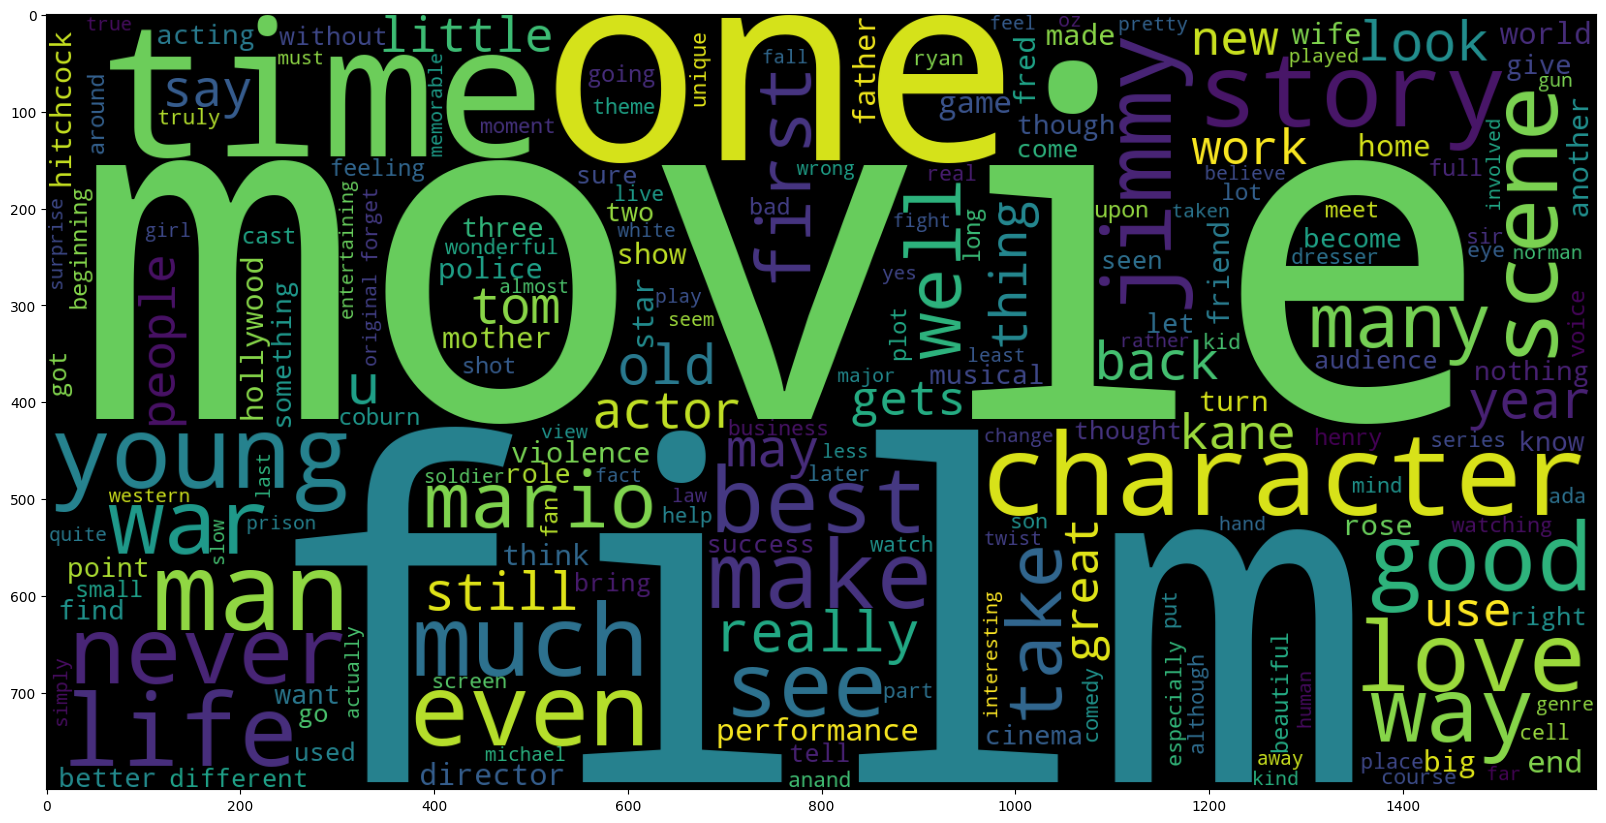

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(width = 1600 , height = 800).generate(" ".join(df[df['sentiment'] == 'positive']['review']))
plt.imshow(wc)

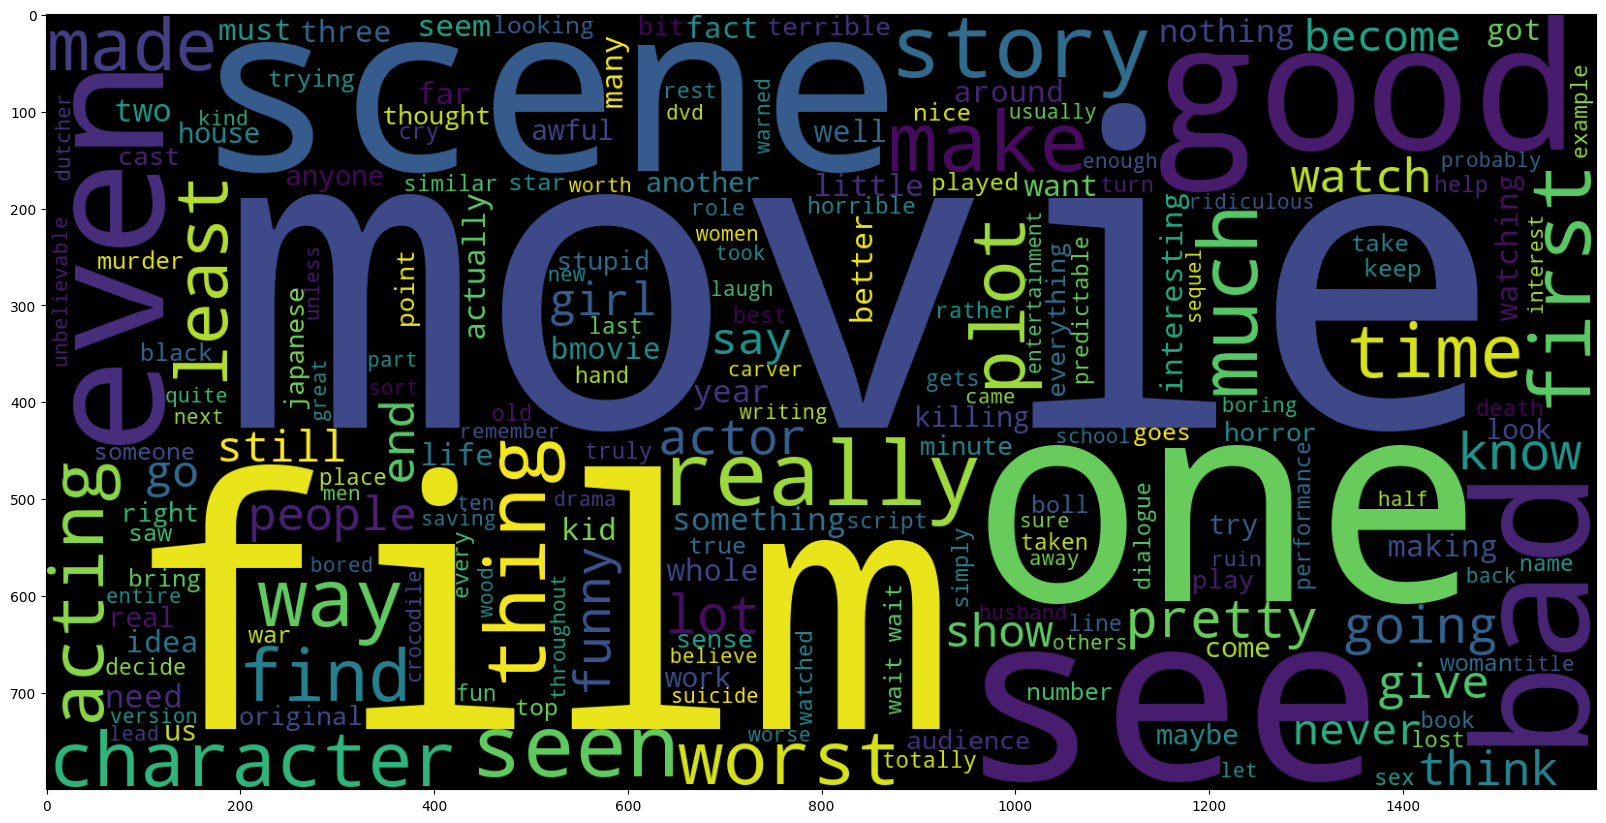

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(width = 1600 , height = 800).generate(" ".join(df[df['sentiment'] == 'negative']['review']))
plt.imshow(wc)

In [50]:
# BoW

from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000,ngram_range=(1,3))
bag_of_words = count_vectorizer.fit_transform(df['review'])
bag_of_words = pd.DataFrame(bag_of_words.toarray(),columns = count_vectorizer.get_feature_names_out())

In [51]:
bag_of_words

,0510,10,12,15,1990,1990s,20,2000,23,23 awful,...,yet,york,york city,young,young boy,young women,younger,youth,zellweger,zeus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(bag_of_words.values)

In [56]:
pca_result.shape

(100, 2)

<Axes: >

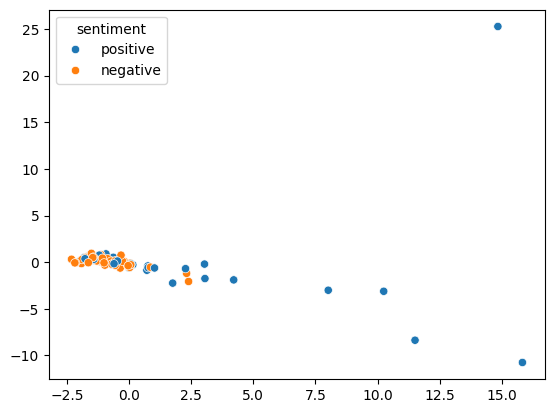

In [62]:
sns.scatterplot(x=pca_result[:,0],y=pca_result[:,1],hue=df['sentiment'])